<a href="https://colab.research.google.com/github/FrancisBacon95/Classification-of-ECG-signals/blob/master/06_Classification_of_ECG_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from collections import defaultdict

# 1. 데이터 분포 확인

In [42]:
path="./gdrive/My Drive/Colab Notebooks/(록스)mitbih_database"
#path="./(록스)mitbih_database/"
classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=='csv':
        records.append(path+"/"+f)
records.sort()
annotations.sort()

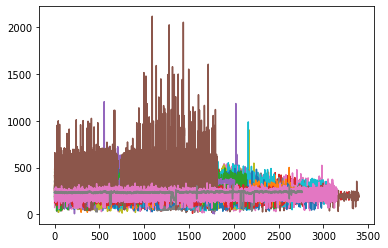

In [43]:
avg_list=[]
names=[]
for i in range(len(annotations)):
    names.append(annotations[i].split('/')[-1].split('.')[0].split('a')[0])
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    a_list=[]
    for i in range(3,len(lines)):
        now=list(filter(None,lines[i].split(" ")))[1]
        before=list(filter(None,lines[i-1].split(" ")))[1]
        a_list.append(int(now)-int(before))

    plt.plot(range(0,len(a_list)),a_list)

    a_array=np.array(a_list)
    avg=np.mean(a_array)
    avg_list.append(avg)

■■■ 인원별 평균 비트의 길이 : 287.324873424873 ■■■


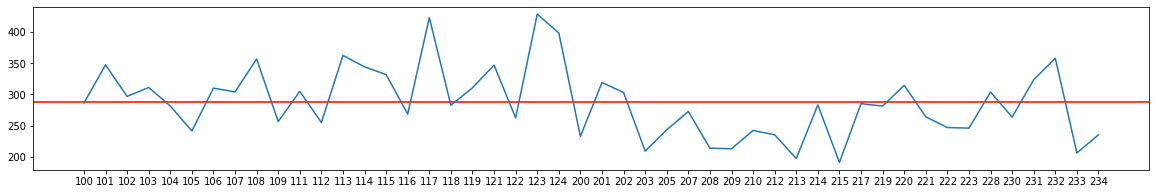

In [44]:
print("■■■ 인원별 평균 비트의 길이 :",sum(avg_list)/len(avg_list),"■■■")
plt.figure(figsize=(20, 3))
plt.axhline(y=sum(avg_list)/len(avg_list), xmin=0, xmax=1,color='red')
plt.plot(names,avg_list)

In [45]:
person_aux_detection=defaultdict(int)
class_aux_dectection=defaultdict(int)

classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
#maximum_counting=10000
X,Y=[],[]

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    a=[]
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for j in range(3,len(lines)): # 1번 ~ 2번: 시작 지점이라 이상함
        now_tmp=list(filter(None,lines[j].split(" ")))
        # AUX 부분에 이상한 것 있으면 확인
        if now_tmp[-1] != '0\n':
            #print(records[i],":",now_tmp[-1].split("\t")[1])
            person_aux_detection[records[i].split('/')[-1].split('.')[0]]+=1
            class_aux_dectection[now_tmp[-1].split("\t")[1]]+=1
        before_tmp=list(filter(None,lines[j-1].split(" ")))
        now_num_sample=int(now_tmp[1])
        before_num_sample=int(before_tmp[1])
        beat_type=now_tmp[2]
        if (beat_type in classes):
            beat_idx=classes.index(beat_type)
            count_classes[beat_idx]+=1
            beat=signals[before_num_sample:now_num_sample]
            X.append(beat)
            Y.append(beat_idx)

102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


In [46]:
print(len(X))
print(len(Y))

103371
103371


In [47]:
df_class_aux_dectection = pd.DataFrame([(k.split('\n')[0],v) for k,v in class_aux_dectection.items()],columns=['class','aux_num'])
df_person_aux_detection = pd.DataFrame([(k, v) for k, v in person_aux_detection.items()], columns=['id', 'aux_num'])
display(df_class_aux_dectection)
display(df_person_aux_detection)

,class,aux_num
0,(B,219
1,(N,470
2,(VT,61
3,(T,83
4,(SVTA,26
5,(NOD,36
6,(IVR,4
7,(AFIB,102
8,(AFL,45
9,(VFL,6


,id,aux_num
0,106,40
1,114,2
2,119,102
3,124,12
4,200,147
5,201,34
6,202,7
7,203,44
8,205,12
9,207,23


In [48]:
print("전체 X 값 :",len(X))
print("Aux 값 찍힌곳 :",sum(list(df_class_aux_dectection.iloc[:,1])))
print("비율 :",round((sum(list(df_class_aux_dectection.iloc[:,1]))/len(X))*100,2))

전체 X 값 : 103371
Aux 값 찍힌곳 : 1632
비율 : 1.58


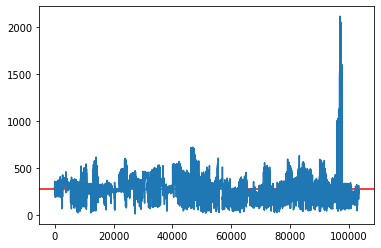

In [49]:
X_len=[len(x) for x in X]
plt.axhline(y=sum(X_len)/len(X_len), xmin=0, xmax=1, color='red')
plt.plot(range(0,len(X_len)),X_len)

데이터의 개수 103371
평균 280.57439707461475
분산 6399.240063453944
표준 편차 79.9952502555867
최대값 2114
최소값 11
중앙값 270.0
1사분위 233.0
2사분위 270.0
3사분위 322.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1 시그마 적용: 0.730407948070542
2 시그마 적용: 0.9619429046831316


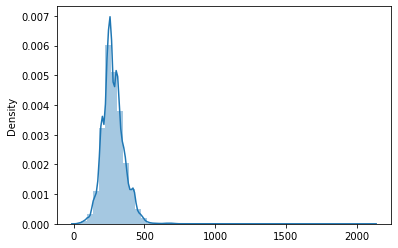

In [50]:
import seaborn as sns
len_x=[len(x) for x in X]

print("데이터의 개수",len(len_x)) # 데이터의 개수
print("평균",np.mean(len_x)) # 평균
print("분산",np.var(len_x)) # 분산
print("표준 편차",np.std(len_x)) # 표준 편차
print("최대값",np.max(len_x)) # 최대값
print("최소값",np.min(len_x)) # 최소값
print("중앙값",np.median(len_x)) # 중앙값
print("1사분위",np.percentile(len_x, 25)) # 1사분위 수
print("2사분위",np.percentile(len_x, 50)) # 2사분위 수 = 중앙값
print("3사분위",np.percentile(len_x, 75)) # 3사분위 수

sns.distplot(len_x)

upper=np.mean(len_x)+np.std(len_x)
lower=np.mean(len_x)-np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1

print("1 시그마 적용:",cnt/len(len_x))
upper=np.mean(len_x)+2*np.std(len_x)
lower=np.mean(len_x)-2*np.std(len_x)
cnt=0
for item in len_x:
    if upper>=item and lower<=item:
        cnt+=1
print("2 시그마 적용:",cnt/len(len_x))

## 결론
### 1) 2시그마 범위 안에 97%가 포함되므로 비트 단위를 mean + 2sigma로 표현한다.
### 2) window size/2를 mean+2sigma로 활용한다.

In [51]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        print(classes[Y[i]])
print(np.shape(X))

(103371,) (103371,)
N
A
V
/
L
R
(103371,)


# 2. 데이터 전처리

In [52]:
window_size = int((np.mean(len_x)+2*np.std(len_x))/2)
print("window size: ",window_size)
maximum_counting = 100000
classes=['N','L','R','A','V','/']
n_classes=len(classes)
count_classes=[0]*n_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=="csv":
        records.append(path+"/"+f)
annotations.sort()
records.sort()

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for line in lines[1:]: #lines의 0은 Header
        tmp=line.split(' ')
        tmp=filter(None, tmp)
        next(tmp)
        pos=int(next(tmp))
        arrhythmia_type=next(tmp)
        if (arrhythmia_type in classes):
            arrhythmia_index=classes.index(arrhythmia_type)
            if count_classes[arrhythmia_index]> maximum_counting:
                continue
            else:
                count_classes[arrhythmia_index]+=1
                if (window_size<pos and pos<(len(signals)-window_size)): 
                    beat=signals[pos-window_size+1:pos+window_size] #beat size
                    X.append(beat)
                    Y.append(arrhythmia_index)

window size:  220
102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


In [53]:
from collections import defaultdict
window_size = int((np.mean(len_x)+2*np.std(len_x))/2)
print("window size: ",window_size)
maximum_counting = 100000

super_classes=[['N','N','L','R'],['SVEB','A','a','J','S','e','j'],['VEB','V','E'],['F','F'],['Q','P','/','f','u']]
super_classes2=["N","SVEB","VEB","F","Q"]
n_super_classes=len(super_classes)
count_super_classes=[0]*n_super_classes
X,Y=[],[]

filenames= os.listdir(path)
records,annotations=[],[]
for f in filenames:
    if f.split('.')[1]=='txt':
        annotations.append(path+"/"+f)
    if f.split('.')[1]=="csv":
        records.append(path+"/"+f)
annotations.sort()
records.sort()

for i in range(len(records)):
    record=pd.read_csv(records[i],index_col=0)
    
    signals=[]
    try:
        signals.extend(record.loc[:,"'MLII'"].to_list())
    except:
        #메인 리드가 MLII가 아닌 것은 제외한다.
        print(records[i].split('/')[-1]+" 메인 리드 :",end=" ")
        print(record.columns[0])
        continue

    beat=[]
    
    annotation=open(annotations[i],'r')
    lines=annotation.readlines()
    for line in lines[1:]: #lines의 0은 Header
        tmp=line.split(' ')
        tmp=filter(None, tmp)
        next(tmp)
        pos=int(next(tmp))
        arrhythmia_type=next(tmp)
        super_type="."
        for super_class in super_classes:
            if arrhythmia_type in super_class[1:]:
                super_type=super_class[0]
                break
                
        if super_type in super_classes2:
            super_type_index=super_classes2.index(super_type)
            if count_super_classes[super_type_index]> maximum_counting:
                continue
            else:
                count_super_classes[super_type_index]+=1
                if (window_size<pos and pos<(len(signals)-window_size)): 
                    beat=signals[pos-window_size+1:pos+window_size] #beat size
                    X.append(beat)
                    Y.append(super_type_index)

window size:  220
102.csv 메인 리드 : 'V5'
104.csv 메인 리드 : 'V5'


## 2-1. 데이터 shape

(104993, 439) (104993,)
N
SVEB
VEB
Q
F


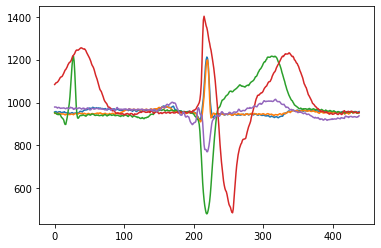

In [54]:
print(np.shape(X),np.shape(Y))

tmp=[]
for i in range(len(X)):
    if Y[i] not in tmp:
        tmp.append(Y[i])
        plt.plot(X[i])
        print(super_classes2[Y[i]])

In [55]:
# X 배열 끝에 Y값 삽입
for i in range(len(X)):
    X[i].append(Y[i])
    
X_train_df = pd.DataFrame(X)
#각각의 beat type의 count
per_class=X_train_df[X_train_df.shape[1]-1].value_counts()
print(per_class) #V5 포함했을 때와 비교했을 때 '5'의 카운트가 크게 차이남

0    90060
2     7228
4     3878
1     3025
3      802
Name: 439, dtype: int64


## 2-2. Resampling
### 5000 이상 : 중복 X   // 5000 이하 : 중복 O

In [56]:
from sklearn.utils import resample

resampled_X_train_df=pd.DataFrame()
for name, group in X_train_df.groupby(X_train_df[X_train_df.shape[1]-1]):
    if len(group)>5000:
        tmp=resample(group,replace=False,n_samples=5000, random_state=880818)
    else:
        tmp=resample(group,replace=True, n_samples=5000, random_state=880818)
    print(len(tmp))
    resampled_X_train_df=pd.concat([resampled_X_train_df,tmp])
print(len(resampled_X_train_df))
resampled_X_train_df

5000
5000
5000
5000
5000
25000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
36472,875,874,874,871,870,868,866,865,865,868,869,871,871,874,873,872,870,865,865,866,865,866,867,869,870,869,870,871,869,866,862,862,863,860,865,866,867,870,870,870,...,872,870,871,869,870,869,871,872,874,873,874,873,870,869,866,867,866,867,867,869,870,871,870,872,871,870,868,867,867,866,869,868,871,870,870,869,871,870,867,0
6839,937,935,936,941,942,940,937,938,936,936,939,938,937,936,935,935,937,937,937,936,936,937,936,936,937,938,940,943,944,943,941,942,944,950,955,957,957,959,959,964,...,965,969,966,964,962,966,967,969,969,967,965,966,966,967,968,968,968,969,971,972,976,977,978,983,988,988,986,982,979,987,995,999,997,999,1002,1007,1010,1014,1012,0
93749,1017,1020,1024,1027,1029,1030,1029,1031,1031,1038,1046,1055,1061,1063,1065,1063,1063,1057,1057,1059,1062,1068,1074,1079,1078,1077,1075,1074,1075,1082,1082,1081,1079,1078,1074,1074,1076,1078,1080,1079,...,992,991,989,990,989,991,994,996,995,995,996,997,996,995,994,994,994,991,990,993,994,996,996,997,998,995,997,995,995,995,997,1002,1005,1010,1012,1010,1010,1011,1007,0
80363,839,836,835,832,829,827,827,826,830,832,831,836,836,839,841,845,847,853,857,859,868,874,881,884,891,899,902,906,908,908,912,911,907,912,914,919,918,923,924,924,...,945,945,943,938,936,936,937,941,940,943,942,943,940,940,938,935,934,936,933,933,937,937,938,938,939,938,941,938,937,936,939,940,943,946,947,948,948,948,948,0
20484,856,856,854,851,848,846,848,854,855,855,853,854,852,849,851,853,852,853,852,849,846,842,842,836,832,829,829,830,833,834,835,838,839,838,835,836,838,839,840,843,...,891,891,890,891,894,893,897,902,907,912,912,914,908,901,896,894,897,901,908,911,916,915,911,906,900,897,899,898,896,894,893,891,888,887,884,884,885,884,881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11737,1000,1005,1012,1023,1031,1034,1036,1044,1054,1061,1066,1067,1067,1070,1081,1086,1089,1090,1089,1094,1106,1114,1118,1121,1121,1123,1124,1128,1129,1130,1130,1131,1130,1131,1133,1133,1130,1133,1129,1129,...,827,828,826,821,821,820,823,822,820,817,820,819,817,817,814,815,814,811,808,805,807,813,823,826,826,820,815,814,817,823,823,819,815,815,816,819,823,825,824,4
79615,1042,1043,1045,1050,1050,1057,1056,1056,1060,1065,1071,1073,1075,1078,1079,1090,1095,1096,1098,1100,1109,1115,1124,1130,1134,1136,1143,1148,1158,1161,1164,1165,1172,1177,1182,1182,1185,1183,1187,1190,...,967,964,963,962,962,964,966,966,962,960,960,963,964,961,958,955,954,956,960,959,955,952,950,951,957,953,949,947,950,951,953,950,946,946,944,947,948,948,942,4
78104,1163,1166,1168,1171,1179,1182,1183,1181,1187,1193,1198,1200,1201,1202,1200,1204,1205,1205,1206,1205,1205,1205,1205,1205,1196,1193,1189,1187,1183,1181,1175,1167,1160,1153,1148,1143,1136,1124,1115,1108,...,1023,1025,1020,1018,1015,1016,1016,1017,1016,1014,1013,1019,1017,1019,1017,1013,1011,1016,1017,1017,1018,1018,1016,1017,1019,1021,1019,1016,1018,1019,1020,1020,1018,1016,1015,1014,1017,1018,1015,4
11366,1019,1020,1020,1019,1024,1029,1036,1039,1042,1042,1045,1051,1059,1061,1063,1067,1070,1078,1085,1090,1094,1096,1102,1106,1112,1120,1120,1124,1128,1132,1139,1140,1142,1145,1150,1151,1155,1156,1154,1157,...,947,952,951,950,947,947,946,949,951,949,950,948,947,950,953,954,954,954,958,962,967,970,973,979,983,992,998,1006,1011,1013,1015,1020,1025,1030,1035,1037,1036,1036,1029,4


In [57]:
from sklearn.utils import resample

resampled_X_train_df=pd.DataFrame()
for name, group in X_train_df.groupby(X_train_df[X_train_df.shape[1]-1]):
    if len(group)>3000:
        tmp=resample(group,replace=False,n_samples=3000, random_state=880818)
    else:
        tmp=resample(group,replace=True, n_samples=3000, random_state=880818)
    print(len(tmp))
    resampled_X_train_df=pd.concat([resampled_X_train_df,tmp])
print(len(resampled_X_train_df))
resampled_X_train_df

3000
3000
3000
3000
3000
15000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
36472,875,874,874,871,870,868,866,865,865,868,869,871,871,874,873,872,870,865,865,866,865,866,867,869,870,869,870,871,869,866,862,862,863,860,865,866,867,870,870,870,...,872,870,871,869,870,869,871,872,874,873,874,873,870,869,866,867,866,867,867,869,870,871,870,872,871,870,868,867,867,866,869,868,871,870,870,869,871,870,867,0
6839,937,935,936,941,942,940,937,938,936,936,939,938,937,936,935,935,937,937,937,936,936,937,936,936,937,938,940,943,944,943,941,942,944,950,955,957,957,959,959,964,...,965,969,966,964,962,966,967,969,969,967,965,966,966,967,968,968,968,969,971,972,976,977,978,983,988,988,986,982,979,987,995,999,997,999,1002,1007,1010,1014,1012,0
93749,1017,1020,1024,1027,1029,1030,1029,1031,1031,1038,1046,1055,1061,1063,1065,1063,1063,1057,1057,1059,1062,1068,1074,1079,1078,1077,1075,1074,1075,1082,1082,1081,1079,1078,1074,1074,1076,1078,1080,1079,...,992,991,989,990,989,991,994,996,995,995,996,997,996,995,994,994,994,991,990,993,994,996,996,997,998,995,997,995,995,995,997,1002,1005,1010,1012,1010,1010,1011,1007,0
80363,839,836,835,832,829,827,827,826,830,832,831,836,836,839,841,845,847,853,857,859,868,874,881,884,891,899,902,906,908,908,912,911,907,912,914,919,918,923,924,924,...,945,945,943,938,936,936,937,941,940,943,942,943,940,940,938,935,934,936,933,933,937,937,938,938,939,938,941,938,937,936,939,940,943,946,947,948,948,948,948,0
20484,856,856,854,851,848,846,848,854,855,855,853,854,852,849,851,853,852,853,852,849,846,842,842,836,832,829,829,830,833,834,835,838,839,838,835,836,838,839,840,843,...,891,891,890,891,894,893,897,902,907,912,912,914,908,901,896,894,897,901,908,911,916,915,911,906,900,897,899,898,896,894,893,891,888,887,884,884,885,884,881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79582,1060,1065,1073,1076,1076,1077,1082,1086,1094,1098,1101,1105,1111,1123,1131,1137,1140,1140,1144,1152,1155,1158,1159,1159,1161,1165,1168,1168,1167,1165,1162,1164,1160,1159,1151,1142,1139,1135,1132,1126,...,922,918,916,915,921,920,919,914,911,915,918,919,918,915,916,919,918,920,916,915,914,915,914,920,915,909,910,913,918,920,918,915,916,917,920,923,921,916,916,4
79618,1075,1078,1084,1090,1100,1106,1108,1108,1111,1113,1116,1118,1124,1124,1129,1139,1145,1148,1152,1154,1159,1164,1173,1178,1175,1180,1185,1194,1196,1198,1200,1195,1196,1199,1201,1200,1196,1190,1189,1187,...,971,969,969,967,970,976,978,979,979,978,978,978,979,974,969,969,967,969,970,971,970,969,969,969,975,972,970,964,966,970,972,971,969,961,965,966,968,966,962,4
77861,1031,1031,1033,1031,1032,1037,1041,1047,1049,1050,1050,1055,1060,1064,1068,1069,1072,1074,1081,1085,1088,1087,1092,1095,1101,1103,1105,1110,1111,1117,1123,1130,1132,1133,1132,1135,1144,1147,1147,1148,...,950,952,953,954,952,949,945,945,950,952,948,944,941,943,945,948,949,946,945,943,945,947,945,944,946,949,954,956,957,955,954,957,957,958,954,951,949,946,949,4
77923,1028,1030,1033,1038,1044,1047,1051,1050,1056,1063,1070,1072,1077,1075,1081,1087,1095,1099,1102,1101,1100,1108,1113,1116,1118,1115,1116,1118,1122,1121,1119,1116,1115,1116,1118,1113,1108,1100,1094,1087,...,944,940,937,933,933,938,939,939,938,932,930,933,935,937,935,933,930,930,933,934,931,928,928,931,934,933,933,928,932,933,934,932,931,930,927,929,930,930,927,4


# 3. Modeling

## 3-1. Set 분할

각 beat type별로 균등하게 Set 분할 실시

In [58]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

train, test=train_test_split(resampled_X_train_df,test_size=0.20)
print("X_train : ",len(train))
print("X_test : ",len(test))
print(type(test))
test.iloc[:,-1].value_counts()
test

X_train :  12000
X_test :  3000
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
23699,1016,1015,1017,1018,1017,1014,1012,1013,1017,1020,1018,1015,1015,1016,1019,1022,1021,1017,1016,1015,1016,1018,1019,1013,1014,1018,1019,1020,1020,1014,1010,1013,1018,1020,1015,1015,1013,1014,1017,1018,...,1027,1029,1026,1028,1033,1034,1033,1030,1027,1030,1031,1034,1031,1029,1028,1029,1031,1032,1031,1030,1028,1032,1032,1034,1031,1028,1027,1027,1031,1033,1031,1027,1025,1028,1028,1029,1029,1026,1027,0
59097,958,957,959,958,952,957,960,964,966,964,961,960,961,964,972,994,1016,1044,1083,1132,1188,1243,1289,1305,1278,1225,1162,1098,1040,1005,986,977,969,959,957,960,967,969,971,967,...,944,943,944,946,948,948,942,942,943,946,950,947,945,941,944,945,950,952,947,945,944,947,950,949,945,944,945,945,949,951,948,945,948,952,956,959,956,956,957,2
11145,1087,1093,1098,1101,1105,1108,1117,1124,1132,1137,1145,1157,1165,1177,1188,1199,1205,1214,1223,1230,1238,1241,1247,1259,1265,1273,1270,1271,1266,1269,1270,1276,1278,1278,1277,1277,1278,1277,1273,1268,...,855,856,857,859,858,856,856,857,859,857,857,855,856,857,858,863,862,859,859,862,864,864,866,865,863,865,866,867,865,865,867,870,870,873,872,870,869,870,872,4
59555,902,904,908,908,908,903,905,909,913,911,913,915,914,914,912,918,917,916,917,917,922,922,923,925,923,922,916,917,912,909,908,906,910,906,907,910,910,916,924,929,...,927,901,879,866,860,861,858,847,837,830,828,830,831,829,827,825,828,828,823,815,811,810,811,811,819,824,820,811,801,793,789,784,781,780,782,784,790,793,789,3
70128,961,959,960,964,967,968,967,964,961,960,955,951,950,949,950,958,980,1022,1080,1149,1233,1317,1397,1462,1497,1491,1453,1395,1321,1236,1153,1080,1012,950,891,849,829,835,857,885,...,993,996,998,995,993,987,983,981,985,997,1026,1069,1121,1188,1265,1347,1418,1475,1502,1492,1442,1368,1277,1185,1095,1019,955,900,858,831,827,839,864,892,920,934,944,942,935,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57209,941,944,947,949,945,947,949,948,953,952,953,952,952,954,958,958,958,955,957,959,963,964,960,959,958,962,966,965,965,960,963,963,964,966,965,963,962,964,963,964,...,965,964,965,966,965,966,962,959,961,962,966,965,966,964,963,965,968,967,965,965,966,965,968,969,967,967,964,967,966,970,966,960,962,966,965,967,964,966,965,2
9179,944,943,940,938,938,939,941,940,938,938,940,943,944,944,943,943,940,947,951,952,948,945,951,952,957,958,957,954,955,957,963,961,960,959,959,959,964,961,961,959,...,970,973,975,972,972,969,969,972,974,972,970,968,968,969,970,971,964,967,967,967,971,971,966,964,963,965,967,970,965,961,960,965,964,964,962,958,958,957,962,0
69232,953,955,956,958,959,960,960,958,957,953,950,949,948,948,954,970,995,1035,1083,1139,1202,1278,1358,1427,1468,1471,1434,1370,1286,1194,1101,1019,950,892,848,822,818,828,850,877,...,985,986,986,983,979,977,973,969,970,970,980,1000,1032,1083,1143,1214,1295,1372,1438,1485,1496,1468,1410,1338,1261,1175,1093,1014,944,883,835,816,818,840,872,901,921,930,931,3
87224,1015,1012,1014,1015,1016,1018,1017,1015,1014,1014,1017,1019,1016,1015,1015,1016,1018,1020,1019,1016,1015,1016,1019,1020,1017,1016,1017,1019,1022,1023,1021,1017,1015,1019,1022,1021,1020,1017,1018,1021,...,999,1002,1000,997,997,999,999,999,999,995,996,997,1001,1003,1000,997,996,997,998,999,995,995,995,993,998,998,995,992,993,997,998,998,996,991,991,995,999,996,994,1


In [59]:
cate=resampled_X_train_df.groupby(439)
train=pd.DataFrame([],columns=resampled_X_train_df.columns)
test=pd.DataFrame([],columns=resampled_X_train_df.columns)

for i in range(len(super_classes2)):
  tmp_df=cate.get_group(i)
  tmp_train, tmp_test=train_test_split(tmp_df,test_size=0.20)
  train=pd.concat([train,tmp_train])
  test=pd.concat([test,tmp_test])
test.iloc[:,-1].value_counts()
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
65885,968,962,959,960,960,960,961,955,952,954,954,951,951,945,947,949,947,948,946,944,943,944,944,942,940,938,939,941,943,943,943,941,942,943,945,944,942,943,942,944,...,972,972,972,969,969,973,974,977,974,974,974,975,977,978,978,975,975,975,976,981,980,978,978,979,980,979,982,981,980,980,980,982,983,979,982,979,983,980,979,0
4371,1041,1033,1031,1028,1023,1018,1011,1004,1001,996,993,987,982,975,975,974,972,968,966,963,962,963,958,961,960,957,959,961,958,957,954,954,957,959,960,960,957,956,958,959,...,963,961,959,958,962,961,960,960,954,955,957,959,959,957,956,956,957,957,957,955,951,951,953,953,954,953,948,950,953,954,955,952,948,948,948,951,948,947,946,0
26309,938,932,933,932,934,935,935,934,937,933,933,927,926,921,918,913,909,906,906,905,902,901,898,896,891,891,886,886,887,884,885,884,885,885,886,885,883,883,883,881,...,939,938,939,943,945,945,947,948,948,948,947,945,945,945,948,949,950,954,952,953,951,950,951,949,950,951,951,952,951,952,955,953,951,948,948,946,948,945,945,0
69532,1286,1198,1109,1027,953,885,837,807,802,816,843,871,886,891,885,873,860,854,852,856,859,860,862,856,856,857,853,851,849,846,843,842,840,841,842,843,846,844,840,837,...,925,924,927,924,921,915,908,905,908,925,948,989,1036,1095,1164,1241,1319,1384,1428,1430,1390,1320,1233,1139,1047,961,888,828,784,759,758,770,792,817,840,851,859,862,854,0
10601,958,960,955,945,947,946,946,944,936,935,937,942,945,948,948,944,948,948,950,949,944,939,943,953,958,958,954,951,950,953,952,952,949,950,950,955,958,960,959,956,...,1025,1027,1027,1020,1016,1014,1015,1017,1014,1009,1002,1003,1006,1008,1008,1003,1000,995,994,994,994,993,992,993,989,989,990,988,984,984,984,986,993,991,987,982,979,981,984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12651,1145,1153,1154,1153,1155,1154,1154,1155,1158,1165,1171,1176,1175,1176,1176,1181,1181,1182,1185,1188,1189,1192,1194,1196,1198,1200,1200,1206,1209,1212,1215,1214,1214,1214,1214,1217,1216,1216,1212,1214,...,933,933,934,931,928,932,933,934,934,932,932,933,934,933,934,932,934,935,937,937,936,933,934,934,935,936,936,935,933,935,935,936,935,931,930,931,933,932,931,4
12555,1161,1164,1170,1175,1176,1175,1178,1181,1187,1194,1198,1200,1205,1208,1214,1218,1222,1224,1226,1228,1233,1235,1238,1237,1235,1234,1235,1234,1233,1229,1224,1216,1213,1212,1208,1199,1191,1182,1174,1165,...,1038,1035,1033,1032,1035,1038,1038,1035,1035,1035,1033,1035,1036,1035,1034,1035,1037,1041,1038,1040,1039,1041,1043,1043,1047,1044,1042,1043,1044,1049,1046,1042,1041,1040,1042,1044,1045,1044,1041,4
78545,1320,1326,1332,1336,1336,1334,1333,1335,1338,1344,1353,1359,1357,1351,1351,1354,1355,1359,1365,1375,1386,1407,1422,1427,1423,1409,1393,1389,1394,1408,1416,1418,1410,1396,1386,1382,1390,1400,1407,1404,...,986,986,997,1013,1023,1028,1029,1023,1016,1009,1004,997,998,1003,1011,1014,1011,999,990,995,1000,1008,1006,998,986,980,987,1000,1003,996,984,971,962,961,968,978,987,989,991,4
11865,1000,1003,1012,1019,1023,1021,1022,1027,1035,1040,1043,1045,1052,1060,1071,1076,1081,1084,1088,1096,1105,1112,1114,1115,1122,1132,1138,1143,1148,1148,1151,1154,1159,1158,1156,1154,1157,1161,1157,1155,...,891,889,893,896,898,897,895,893,894,898,897,895,894,894,895,897,899,903,903,904,904,907,909,901,895,892,897,904,910,909,914,920,926,924,923,922,926,931,940,4


In [60]:
target_train=train[train.shape[1]-1]
target_test=test[test.shape[1]-1]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
print("Y shape :",np.shape(y_train),np.shape(y_test))

x_train=train.iloc[:,:train.shape[1]-1].values
x_test=test.iloc[:,:test.shape[1]-1].values
x_train=x_train.reshape(len(x_train),x_train.shape[1],1)
x_test=x_test.reshape(len(x_test),x_test.shape[1],1)
print("X shape :",np.shape(x_train),np.shape(x_test))

Y shape : (12000, 5) (3000, 5)
X shape : (12000, 439, 1) (3000, 439, 1)


## 3-2. 모델 학습

In [61]:
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
 
from sklearn.metrics import confusion_matrix

In [62]:
x_test=x_test.reshape(len(x_test),x_test.shape[1])
display(np.shape(x_test))

x_train=x_train.reshape(len(x_train),x_train.shape[1])
np.shape(x_train)

(3000, 439)

(12000, 439)

In [63]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(x_train))
x_train = minMaxScaler.transform(x_train)
x_test = minMaxScaler.transform(x_test)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [64]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [65]:
def network(x_train,y_train,x_test,y_test):
    im_shape=(x_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape),name='inputs_cnn')
    
    #conv. layer 1
    conv1_1=Convolution1D(64,(6),activation="elu",input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    #pooling layer 1
    pool1=MaxPool1D(pool_size=(3),strides=(2),padding="same")(conv1_1)
    #conv. layer 2
    conv2_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    #conv. layer 3
    conv3_1=Convolution1D(128,(3),activation="elu",input_shape=im_shape)(conv2_1)
    conv3_1=BatchNormalization()(conv3_1)
    #pooling layer 2
    pool2=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv3_1)
    #conv. layer 4
    conv4_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(pool2)
    conv4_1=BatchNormalization()(conv4_1)
    #conv. layer 5
    conv5_1=Convolution1D(256,(3),activation="elu",input_shape=im_shape)(conv4_1)
    conv5_1=BatchNormalization()(conv5_1)
    #pooling layer 3
    pool3=MaxPool1D(pool_size=(2),strides=(2),padding="same")(conv5_1)
    #flattened layer 1
    flatten=Flatten()(pool3)
    #dense layers
    dense_end1=Dense(1024,activation='elu')(flatten)
    
    #output layers
    main_output=Dense(5,activation='softmax',name='main_output')(dense_end1)
    
    model=Model(inputs=inputs_cnn,outputs=main_output)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', precision, recall, f1score])
    #model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

    callbacks=[EarlyStopping(monitor='val_accuracy',patience=2),
              ModelCheckpoint(filepath='best_model.h5',monitor='val_accuracy',save_best_only=True)]
    
    history=model.fit(x_train, y_train, epochs=10, callbacks=callbacks, batch_size=32,validation_data=(x_test,y_test))
    model.load_weights('best_model.h5')
    return (model, history)

In [66]:
def evaluate_model(history, X_test, y_test, model) :
    scores = model.evaluate((X_test), y_test, verbose = 0)
    print("Accuracy : %.2f%%" % (scores[1]*100))
    print("F1-score : %.2f%%" % (scores[-1]*100))
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc = 'upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_name = ['0', '1', '2', '3', '4']
    
    y_true = []
    for element in y_test :
        y_true.append(np.argmax(element))
    prediction_proba = model.predict(X_test)
    prediction = np.argmax(prediction_proba, axis = 1)
    cnf_matrix = confusion_matrix(y_true, prediction)

## 3-3. 모델 평가

### 1) Accuracy, F1 Score 평가

In [67]:
x_train=np.asarray(x_train).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(12000, 439)
(12000, 5)
(3000, 439)
(3000, 5)


Epoch 1/10
375/375 [==============================] - 159s 423ms/step - loss: 0.7609 - accuracy: 0.8554 - precision: 0.8704 - recall: 0.8399 - f1score: 0.8545 - val_loss: 11.2579 - val_accuracy: 0.4353 - val_precision: 0.4369 - val_recall: 0.4345 - val_f1score: 0.4357
Epoch 2/10
375/375 [==============================] - 158s 422ms/step - loss: 0.2629 - accuracy: 0.9185 - precision: 0.9247 - recall: 0.9113 - f1score: 0.9179 - val_loss: 0.3703 - val_accuracy: 0.8997 - val_precision: 0.9063 - val_recall: 0.8893 - val_f1score: 0.8975
Epoch 3/10
375/375 [==============================] - 158s 421ms/step - loss: 0.2071 - accuracy: 0.9320 - precision: 0.9373 - recall: 0.9267 - f1score: 0.9319 - val_loss: 0.2563 - val_accuracy: 0.9220 - val_precision: 0.9262 - val_recall: 0.9169 - val_f1score: 0.9215
Epoch 4/10
375/375 [==============================] - 159s 423ms/step - loss: 0.1987 - accuracy: 0.9354 - precision: 0.9406 - recall: 0.9317 - f1score: 0.9360 - val_loss: 2.5956 - val_accuracy: 0

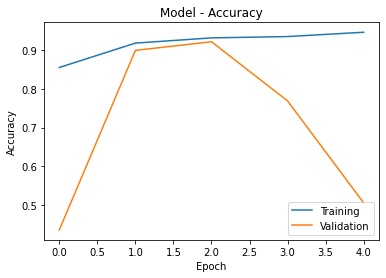

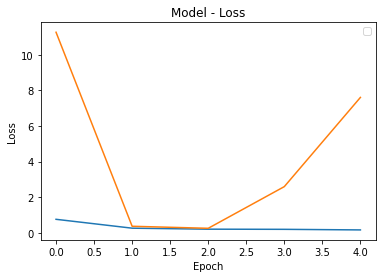

In [68]:
model, history=network(x_train,y_train,x_test,y_test)
scores=model.evaluate((x_test),y_test,verbose=0)
print("Accuracy:",scores[1]*100)
print("F1 score:",scores[-1]*100)
evaluate_model(history, x_test, y_test, model)
y_pred = model.predict(x_test)

### 2) Confusion Matrix

[[308 156  44  91   1]
 [ 43 506  33  18   0]
 [ 15  55 484  45   1]
 [ 76  68  34 421   1]
 [ 20   3  21   6 550]]


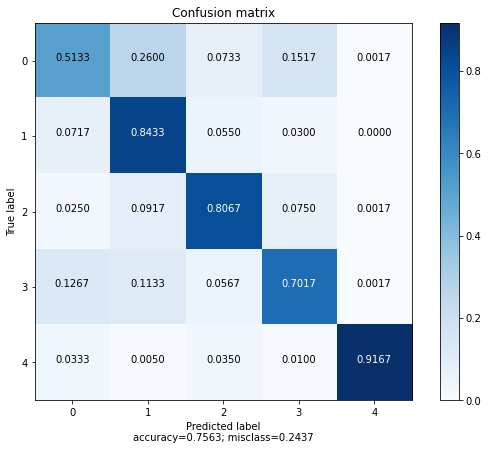

In [34]:
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cnf_matrix)

import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cnf_matrix, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix')

# 4. Clustering